# Predicting Player's Overall Rating using Machine Learning

This notebook will introduce some foundation machine learning and data science concepts by exploring the problem of predicting player's overall rating.

## 1. Problem Definition

In our case, the problem we will be exploring is regression.

This is because we're going to be using a number of different features about players to predict them overall rating.

## 2. Data 

The data we're using is from Kaggle : https://www.kaggle.com/karangadiya/fifa19


## 3. Evaluation 

Since machine learning is very experimental, you might say something like, 
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

## 4. Features

The data includes lastest edition FIFA 2019 players attributes like :
* Age 
* Nationality 
* Overall 
* Potential 
* Club 
* Value 
* Wage 
* Preferred Foot 
* International Reputation 
* Weak Foot 
* Skill Moves 
* Work Rate 
* Position 
* Jersey Number 
* Joined 
* Loaned From 
* Contract Valid Until 
* Height 
* Weight 
* LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB 
* Crossing 
* Finishing 
* Heading 
* Accuracy 
* ShortPassing 
* Volleys 
* Dribbling 
* Curve 
* FKAccuracy 
* LongPassing 
* BallControl 
* Acceleration 
* SprintSpeed 
* Agility 
* Reactions 
* Balance 
* ShotPower 
* Jumping 
* Stamina 
* Strength 
* LongShots 
* Aggression 
* Interceptions 
* Positioning 
* Vision 
* Penalties 
* Composure 
* Marking 
* StandingTackle 
* SlidingTackle 
* GKDiving 
* GKHandling 
* GKKicking 
* GKPositioning 
* GKReflexes 
* Release Clause

## Preparing the tools

* pandas for data analysis
* NumPy for numerical operations
* Matplotlib/seaborn for plotting of data visualization
* Scikit-Learn for machine learning modelling and evaluation

In [1]:
# Regular EDA and plotting libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# parsing data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

## Models
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor

## Model evaluators
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Load Data

In [2]:
# create a data frame
df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
# show a quick insight to the number of missing values you have and what type of data your working with.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

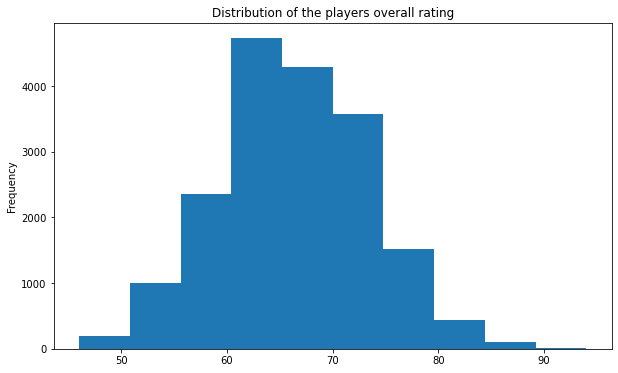

In [4]:
# we are going to predict overall rating
df["Overall"].plot(kind="hist", xlabel="Overall rating", ylabel="Number of players", 
                                  title="Distribution of the players overall rating", figsize=(10, 6));

## Parsing dates

To use a machine learning models all data should be in numerical format and there can't be any missing values.

We want to predict overall rating, so it's a good idea to make sure "Overall" doesn't contains missing values. If nan values exists, we'll drop them.

In [5]:
# check nan values in label "Position" and drop them if exists
if df["Overall"].isna().sum():
    df = df.dropna(subset=["Overall"])
df = df.reset_index(drop=True)
print(f"Number of nan values in label \"Overall\" = {df.Overall.isna().sum()}")

Number of nan values in label "Overall" = 0


In [6]:
# Check for missing values
df.isna().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

### Convert strings to categories

One way to help turn all of our data into numbers is to convert the columns with the string datatype into a category datatype.

To do this we can use the pandas types API which allows us to interact and manipulate the types of data.

In [7]:
# turn columns which contain strings into category values
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Unnamed: 0                18207 non-null  int64   
 1   ID                        18207 non-null  int64   
 2   Name                      18207 non-null  category
 3   Age                       18207 non-null  int64   
 4   Photo                     18207 non-null  category
 5   Nationality               18207 non-null  category
 6   Flag                      18207 non-null  category
 7   Overall                   18207 non-null  int64   
 8   Potential                 18207 non-null  int64   
 9   Club                      17966 non-null  category
 10  Club Logo                 18207 non-null  category
 11  Value                     18207 non-null  category
 12  Wage                      18207 non-null  category
 13  Special                   18207 non-null  int6

### Fill missing values

**Fill missing numerical values**

We're going to fill any numerical column with missing values with the median of that column.

In [8]:
# fill numeric rows with the median
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df[label] = content.fillna(content.median())

In [9]:
# check if there is any null values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

**Fill missing categorical values**

We're going to fill any categorical column with missing values as turning them into numbers.

In [10]:
# fill categorical rows as turning them into numbers
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # we add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1

In [11]:
# check if there is any null values
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [12]:
# check all data frame
df.isna().sum()

Unnamed: 0        0
ID                0
Name              0
Age               0
Photo             0
                 ..
GKHandling        0
GKKicking         0
GKPositioning     0
GKReflexes        0
Release Clause    0
Length: 89, dtype: int64

In [13]:
# drop all columns which contains a ref to images
df.drop("Photo", axis=1, inplace=True)
df.drop("Flag", axis=1, inplace=True)
df.drop("Club Logo", axis=1, inplace=True)

In [14]:
# check all data frame if not numerical columns exists
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Name
Nationality
Value
Wage


In [15]:
# create a function which convert column with price into int format
def convert_from_price_into_int(df, column_name):
    """
    Convert values in column from price as (€100K) to int format
    df : source data frame,
    column_name : name of column to convert
    """
    df[column_name] = df[column_name].str.replace('[€\,\.]', '')
    df[column_name] = df[column_name].str.replace('M', '000000')
    df[column_name] = df[column_name].str.replace('K', '000')
    df[column_name] = df[column_name].astype(float)
    
convert_from_price_into_int(df, "Wage")
convert_from_price_into_int(df, "Value")

In [16]:
# check all data frame if not numerical columns exists
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Name
Nationality


In [17]:
df.isna().sum()

Unnamed: 0        0
ID                0
Name              0
Age               0
Nationality       0
                 ..
GKHandling        0
GKKicking         0
GKPositioning     0
GKReflexes        0
Release Clause    0
Length: 86, dtype: int64

## 5. Modelling

Before we build a model, we have to get our dataset ready.

In [18]:
# random seed for reproducibility
np.random.seed(42)

# everything except Overall variable (we want to predict Overall)
X = df.drop("Overall", axis=1)
# Overall variable
y = df["Overall"]

We have two category columns 
* Name
* Nationality
and we need encode these features

In [19]:
categorical_features = ["Name", "Nationality"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# fill train and test values separately
transformed_X = transformer.fit_transform(df)

# check transformed and filled X_train
transformed_X.toarray()

array([[  0.,   0.,   0., ...,  14.,   8., 294.],
       [  0.,   0.,   0., ...,  14.,  11.,  83.],
       [  0.,   0.,   0., ...,  15.,  11., 295.],
       ...,
       [  0.,   0.,   0., ...,   6.,  13., 171.],
       [  0.,   0.,   0., ...,   8.,   9., 121.],
       [  0.,   0.,   0., ...,  12.,   9., 171.]])

Split our data on 
* training set (about 80%)
* test set (about 20%)

In [20]:
# split data on train and test sets
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

After parsing the data we should be able to build a machine learning model. We'll be using the following and comparing their results.

1. ElasticNet
2. RandomForestRegressor

In [21]:
# put models in a dictionary 
models = {"ElasticNet" : ElasticNet(), 
         "RandomForestRegressor" : RandomForestRegressor()}

# create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # random seed for reproducible results
    np.random.seed(42)
    # make a list to keep model scores
    model_scores = {}
    # loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        # evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores        

model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'ElasticNet': 0.9925104323569715, 'RandomForestRegressor': 0.9999671491559173}

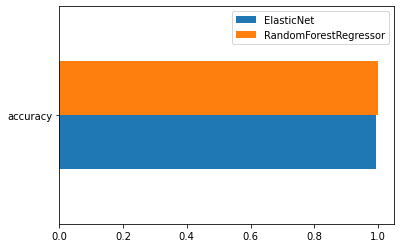

In [22]:
# compare accuracy for two models
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.plot.barh();

In [23]:
# create a function to evaluate the model
def evaluate(models, X_test, y_test):
    """
    Evaluates metrics on the test set.
    models : a dict of different Scikit-Learn machine learning models
    X_test : testing data
    y_test : labels assosciated with test data
    """
    # random seed for reproducible results
    np.random.seed(42)
    # make a list to keep model metrics
    model_metrics = {}
    # loop through models
    for name, model in models.items():
        y_preds = model.predict(X_test)
        model_metrics[name] = {"R^2" : r2_score(y_test, y_preds), 
                               "MAE" : mean_absolute_error(y_test, y_preds), 
                              "MSE" : mean_squared_error(y_test, y_preds)}
    return model_metrics
        
model_metrics = evaluate(models, X_test, y_test)
model_metrics

{'ElasticNet': {'R^2': 0.9925104323569715,
  'MAE': 0.41941252481998575,
  'MSE': 0.34832192359746483},
 'RandomForestRegressor': {'R^2': 0.9999671491559173,
  'MAE': 0.0023366282262493347,
  'MSE': 0.0015278143876990748}}

In [24]:
# compare accuracy for two models
model_compare = pd.concat([pd.DataFrame(model_metrics['ElasticNet'], index=['ElasticNet']), 
                           pd.DataFrame(model_metrics['RandomForestRegressor'], index=['RandomForestRegressor'])])
model_compare

,R^2,MAE,MSE
ElasticNet,0.992510,0.419413,0.348322
RandomForestRegressor,0.999967,0.002337,0.001528


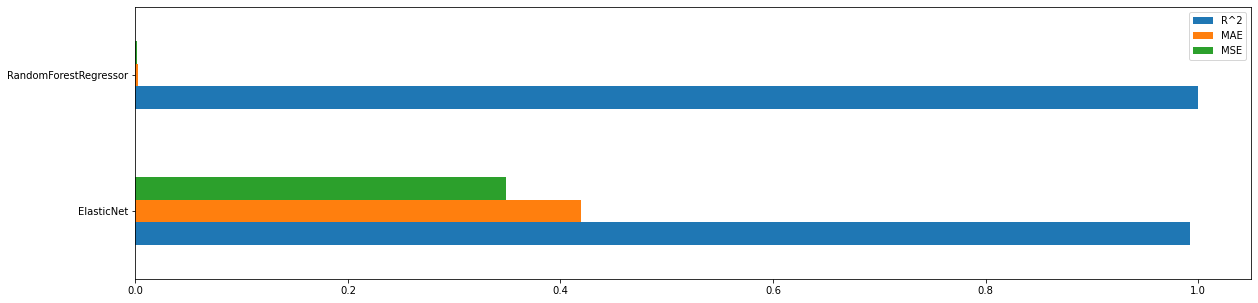

In [25]:
model_compare.plot.barh(figsize=(20, 5));

Make our predictions more visible. Create a data frame with y_tests and y_preds and plot it.

In [26]:
# create a function for visible predictions
def plot_results(models, X_test, y_test):
    """
    Plot a distribution of test and predicted values.
    models : a dict of different Scikit-Learn machine learning models
    X_test : testing data
    y_test : labels assosciated with test data
    """
    fig, ax = plt.subplots(nrows=1, ncols=len(models), figsize=(12, 5))
    # random seed for reproducible results
    np.random.seed(42)
    # loop through models
    i = 0
    for name, model in models.items():
        y_preds = model.predict(X_test)
        df_test_preds = pd.DataFrame(data={"actual values": y_test,  "predictions": y_preds})
        x = np.arange(0, len(df_test_preds), 1)
        ax[i].scatter(x, df_test_preds["actual values"], c='b', label="Acutual Values")
        ax[i].scatter(x, df_test_preds["predictions"], c='r', label="Predictions")
        ax[i].legend();
        ax[i].set_title(name)
        i += 1     

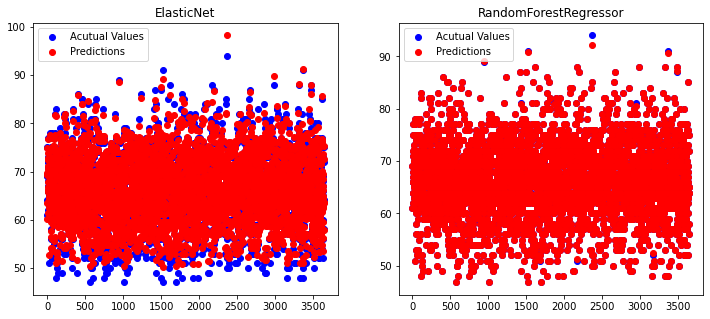

In [27]:
plot_results(models, X_test, y_test)